<a href="https://colab.research.google.com/github/sanjanaaps/EV-market-analysis/blob/main/MarketSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ev market segmentation analysis

 Consumer Affordability & Financial Behavior (Automobile Buying Behavior) Higher disposable income and fewer financial obligations (loans) suggest higher willingness to pay. Younger professionals may be more likely to adopt EVs early.













# physiographic segmentation
# consumer affordability and financial behaviour

In [ ]:
import os
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
!ls /content/gdrive/MyDrive/market-segmentation/
root_dir = "/content/gdrive/MyDrive/market-segmentation/"

'car data.csv'			   ev-charging-stations-india.csv
'CAR DETAILS FROM CAR DEKHO.csv'  'Indian automoble buying behavour study 1.0.csv'
'Car details v3.csv'		   indian-ev-data.csv
'car details v4.csv'		   MarketSegmentation.ipynb


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import DBSCAN

data1 = pd.read_csv(root_dir + r'Indian automoble buying behavour study 1.0.csv')
data1

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,Business,Single,Graduate,0,No,No,No,2400000,0,2400000,SUV,1600000
95,50,Salaried,Married,Post Graduate,3,No,No,Yes,3800000,1300000,5100000,SUV,1600000
96,51,Business,Married,Graduate,2,Yes,Yes,No,2200000,0,2200000,Ciaz,1100000
97,51,Salaried,Married,Post Graduate,2,No,No,Yes,2700000,1300000,4000000,Creata,1500000


In [ ]:
data1['Profession'].value_counts()
ordinal_var = data1[['Profession','Marrital Status','Education','Personal loan','House Loan','Wife Working']]
ordinal_var

,Profession,Marrital Status,Education,Personal loan,House Loan,Wife Working
0,Salaried,Single,Post Graduate,Yes,No,No
1,Salaried,Married,Post Graduate,Yes,Yes,Yes
2,Business,Married,Graduate,Yes,Yes,No
3,Business,Married,Post Graduate,No,No,Yes
4,Salaried,Married,Post Graduate,Yes,No,Yes
...,...,...,...,...,...,...
94,Business,Single,Graduate,No,No,No
95,Salaried,Married,Post Graduate,No,No,Yes
96,Business,Married,Graduate,Yes,Yes,No
97,Salaried,Married,Post Graduate,No,No,Yes


PCA

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ordinal_var=ordinal_var.apply(le.fit_transform)
ordinal_var
pca=PCA()
pca_data=pca.fit_transform(ordinal_var)
pca_data
standard_deviation = np.sqrt(pca.explained_variance_)
proportion_of_variance = pca.explained_variance_ratio_
cummulative_proportion = proportion_of_variance.cumsum()
pca_summary =pd.DataFrame({'standard_deviation':standard_deviation,
                           'proportion_of_variance': proportion_of_variance,
                           'cummulative_proportion':cummulative_proportion})
pca_summary
pca.components_.round(4)
rot_matrix=pca.components_.T
rot_matrix
rot_df=pd.DataFrame(rot_matrix,columns=ordinal_var.columns.values)
rot_df=rot_df.round(3)
rot_df

,Profession,Marrital Status,Education,Personal loan,House Loan,Wife Working
0,0.195,0.347,0.513,0.741,-0.164,-0.056
1,-0.209,-0.311,0.110,0.288,0.485,0.727
2,-0.076,0.030,0.829,-0.544,0.105,0.011
3,0.615,-0.291,0.032,0.059,0.618,-0.388
4,0.724,-0.043,-0.022,-0.200,-0.388,0.532
5,0.096,0.834,-0.192,-0.171,0.441,0.187


components with the highest loadings
*   Marritial status
*   Education



In [ ]:
! pip install bioinfokit

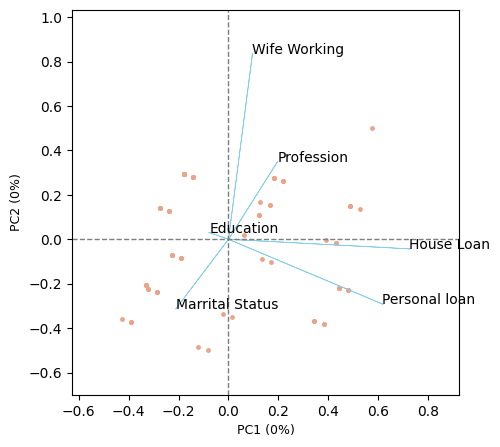

In [ ]:
from bioinfokit.visuz import cluster
cluster.biplot(cscore=pca_data, loadings=pca.components_, labels=ordinal_var.columns.values,var1=0,var2=0, show=True, dim=(5, 5))

the x axis tends to divide the buying behaviour of the customers  the factors that lie on the positive side of the x axis are more likely to buy an electric vehicle

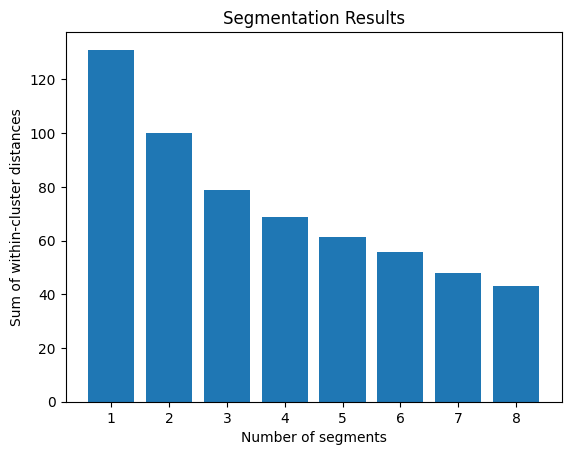

{'1': KMeans(n_clusters=1, n_init=10, random_state=1234),
 '2': KMeans(n_clusters=2, n_init=10, random_state=1234),
 '3': KMeans(n_clusters=3, n_init=10, random_state=1234),
 '4': KMeans(n_clusters=4, n_init=10, random_state=1234),
 '5': KMeans(n_clusters=5, n_init=10, random_state=1234),
 '6': KMeans(n_clusters=6, n_init=10, random_state=1234),
 '7': KMeans(n_clusters=7, n_init=10, random_state=1234),
 '8': KMeans(n_init=10, random_state=1234)}

In [ ]:
np.random.seed(1234)

nrep = 10

num_segments = range(1, 9)
within_cluster_distances = []
MD_km28 = {}

for k in num_segments:
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    kmeans.fit(pca_data)
    within_cluster_distances.append((kmeans.inertia_))
    MD_km28[str(k)] = kmeans

plt.bar(num_segments, within_cluster_distances)
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Segmentation Results")
plt.show()
MD_km28

In [ ]:
# # hyperparameter tuning
# eps_count=[0.5,1.5,2.5,3.5]
# sample_count=[1,2,3,4]

# # setting subplots
# fig,axes=plt.subplots(4,4,figsize=(15,15))

# # applying DBSCAN
# X=ordinal_var

# for i, count in enumerate(eps_count):
#   for j, count in enumerate(sample_count):


#     # performing DBSCAN clustering
#     dbscan= DBSCAN (eps=count, min_samples=7)
#     labels=dbscan.fit_predict(X)

#     ax=axes[i,j]

#     # reserving black color for noise (label=-1)
#     unique_labels=set(labels)
#     colors=[plt.cm.Spectral(each) for each in np.linspace(0,1, len(unique_labels))]
#     for k, col in zip(unique_labels, colors):
#       if k==-1:
#         col=[0,0,0,1]

#       class_member_mask= (labels ==k)
#       xy=X[class_member_mask]
#       ax.scatter(xy.iloc[:, 0], xy.iloc[:,1], c=[col], marker='o', s=50, edgecolors='k')

#       ax.set_title(f'DBSCAN Clustering with eps={eps_count[i]}, min_sample={sample_count[j]}', size=10)
#       ax.set_xlabel('feature 1')
#       ax.set_ylabel('feature 2')

# plt.tight_layout()
# plt.show()

db_param_options = [[20, 5], [25, 5], [30, 5], [25, 7], [35, 7], [40, 5]]

db = DBSCAN(eps = 20, min_samples =5)
db_clusters = db.fit_predict(pca_data)
db.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

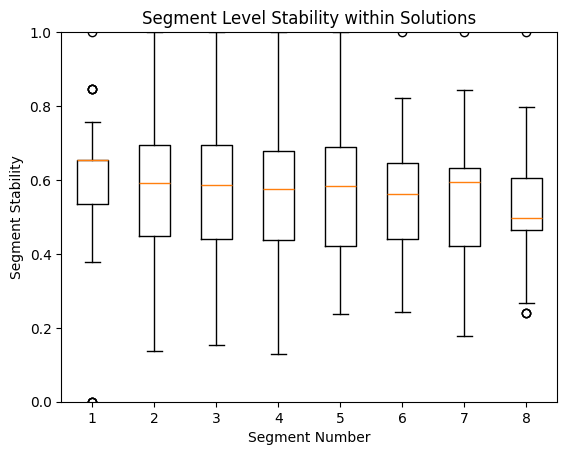

In [ ]:
segment_solutions = ["1","2", "3", "4", "5","6","7","8"]
segment_labels = {}
segment_similarities = {}

for segment in segment_solutions:
    segment_labels[segment] = MD_km28[segment].predict(ordinal_var.values)
    segment_similarities[segment] = MD_km28[segment].transform(ordinal_var.values).min(axis=1)

segment_stability_values = []
for segment in segment_solutions:
    similarities = segment_similarities[segment]
    normalized_similarities = similarities / np.max(similarities)
    segment_stability_values.append(normalized_similarities)

segment_stability_values

plt.boxplot(segment_stability_values, whis=1.5)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.xticks(range(1, len(segment_solutions) + 1), segment_solutions)
plt.ylim(0, 1)
plt.title("Segment Level Stability within Solutions")

plt.show()

in conclusion 7 segments has the highest stability

In [ ]:
range_values = (0, 1)
num_bins = 10
max_frequency = 15

fig, axs = plt.subplots(4, 2, figsize=(12, 8))

for i in range(1, 8):
    labels = MD_km28[str(i)].predict(ordinal_var.values)
    similarities = MD_km28[str(i)].transform(ordinal_var.values).min(axis=1)
    row = (i - 1) // 2
    col = (i - 1) % 2

    axs[row, col].hist(similarities, bins=num_bins, range=range_values)
    axs[row, col].set_xlabel('Similarity')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title('cluster {}'.format(i))

    axs[row, col].set_xlim(range_values)
    axs[row, col].set_ylim(0, max_frequency)


    axs[row, col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

plt.tight_layout()
plt.show()

In [ ]:
num_segments = range(2, 9)

segment_stability = []
for segment in range(2, 9):
    labels_segment = MD_km28[str(segment)].predict(ordinal_var.values)
    segment_stability.append(labels_segment)

plt.figure(figsize=(8, 6))
for i, segment in enumerate(range(2, 9)):
    plt.plot(num_segments, [np.mean(segment_stability[i] == labels) for labels in segment_stability], marker='o', label=f'Segment {segment}')

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(num_segments)
plt.legend()
plt.grid(True)

plt.show()

segment 7 stays conistently high therefore the most stable

In [ ]:
from scipy.stats import entropy

np.random.seed(1234)
k_values = range(2, 9)
MD_m28 = []

for k in k_values:
    model = KMeans(n_clusters=k, random_state=1234)
    model.fit(ordinal_var.values)
    iter_val = model.n_iter_
    converged = True
    k_val = k
    k0_val = k
    log_likelihood = -model.inertia_
    n_samples, _ = ordinal_var.shape
    aic = -2 * log_likelihood + 2 * k
    bic = -2 * log_likelihood + np.log(n_samples) * k
    labels = model.labels_
    counts = np.bincount(labels)
    probs = counts / float(counts.sum())
    class_entropy = entropy(probs)
    icl = bic - class_entropy

    MD_m28.append((iter_val, converged, k_val, k0_val, log_likelihood, aic, bic, icl))
MD_m28 = pd.DataFrame(MD_m28, columns=['iter', 'converged', 'k', 'k0', 'logLik', 'AIC', 'BIC', 'ICL'])

print(MD_m28)

In [ ]:
num_segments = MD_m28["k"]
AIC_values = MD_m28["AIC"]
BIC_values = MD_m28["BIC"]
ICL_values = MD_m28["ICL"]

plt.plot(num_segments, AIC_values, marker='o', label='AIC')
plt.plot(num_segments, BIC_values, marker='o', label='BIC')
plt.plot(num_segments, ICL_values, marker='o', label='ICL')

plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria (AIC, BIC, ICL)')
plt.legend()
plt.grid(True)

plt.show()

elbow found at 4 segments

In [ ]:
from sklearn.mixture import GaussianMixture
k = 4
kmeans = KMeans(n_clusters=k, random_state=1234)
kmeans.fit(ordinal_var)
kmeans_clusters = kmeans.predict(ordinal_var)

gmm = GaussianMixture(n_components=k, random_state=1234)
gmm.fit(ordinal_var)
gmm_clusters = gmm.predict(ordinal_var)

results = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})

MD_m4 = ordinal_var[results['mixture'] == 3]

k4_m4 = KMeans(n_clusters=k, random_state=1234)
k4_m4.fit(MD_m4)
k4_m4_clusters = k4_m4.predict(MD_m4)

results_m4 = pd.DataFrame({'kmeans': k4_m4_clusters, 'mixture': 3})

print(pd.crosstab(results['kmeans'], results['mixture']))
print(pd.crosstab(results['kmeans'], results_m4['kmeans']))

In [ ]:
from sklearn.mixture import GaussianMixture
import numpy as np

gmm_m4a = GaussianMixture(n_components=4)
gmm_m4a.fit(ordinal_var)

log_likelihood_m4a = gmm_m4a.score(ordinal_var)

gmm_m4 = GaussianMixture(n_components=4)
gmm_m4.fit(ordinal_var)

log_likelihood_m4 = gmm_m4.score(ordinal_var)

print("Log-likelihood for MD.m4a:", log_likelihood_m4a)
print("Log-likelihood for MD.m4:", log_likelihood_m4)

In [ ]:
like_counts = pd.value_counts(data1['Total Salary'])
reversed_counts = like_counts.iloc[::-1]

print(reversed_counts)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=7)
kmeans.fit(ordinal_var)

pca = PCA(n_components=2)
MD_pca = pca.fit_transform(ordinal_var)

fig, ax = plt.subplots()

ax.scatter(MD_pca[:, 0], MD_pca[:, 1])
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
plt.show()

# Therefore the segment profiles for optimal number of cluster i.e. 7 clusters are shown below

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# kmeans = MD_km28['4']

# labels = kmeans.labels_

# MD_mean = ordinal_var.groupby(labels).mean()

# fig, axs = plt.subplots(2, 2, figsize=(10, 6))
# axs[0, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[0])
# axs[0, 0].set_title('Component 1')
# axs[0, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[1])
# axs[0, 1].set_title('Component 2')
# axs[1, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[2])
# axs[1, 0].set_title('Component 3')
# axs[1, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[3])
# axs[1, 1].set_title('Component 4')

# for ax in axs.flat:
#     ax.set(ylabel='Variable', xlabel='Proportion')
#     ax.set_yticks(range(MD_mean.shape[1]))
#     ax.set_yticklabels(ordinal_var.columns)

# for ax in axs.flat:
#     ax.label_outer()

# fig.suptitle('Segment Profiles')

# fig.tight_layout()

# plt.show()
import matplotlib.pyplot as plt
import math

# Select the clustering model for a 7-cluster solution.
kmeans = MD_km28['7']
labels = kmeans.labels_

# Compute the mean values of each ordinal variable for each cluster.
MD_mean = ordinal_var.groupby(labels).mean()

# Determine the number of clusters.
num_clusters = MD_mean.shape[0]  # This should be 7.
num_vars = MD_mean.shape[1]

# Define grid dimensions: here we choose 2 columns.
num_cols = 2
num_rows = math.ceil(num_clusters / num_cols)

# Create subplots.
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 4))
axs = axs.flatten()  # Flatten to easily iterate over them.

# Loop through each cluster and create a horizontal bar chart.
for i in range(num_clusters):
    axs[i].barh(range(num_vars), MD_mean.iloc[i])
    axs[i].set_title(f'Segment {i+1}')
    axs[i].set_xlabel('Proportion')
    axs[i].set_ylabel('Variable')
    axs[i].set_yticks(range(num_vars))
    axs[i].set_yticklabels(ordinal_var.columns)

# Remove any extra subplots (if, for example, there are 8 axes but only 7 clusters).
for j in range(num_clusters, len(axs)):
    fig.delaxes(axs[j])

fig.suptitle('Segment Profiles', fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [ ]:
!pip install clusteval

In [ ]:
from clusteval import clusteval
ce = clusteval(evaluate = 'silhouette')
df_array=np.array(ordinal_var)
ce.fit(df_array)
ce.plot()

# Data set 2
# geographic segmentation
# Competitive Landscape (Car Data, India EV Data, Charging Stations)

In [ ]:
! ls /content/gdrive/MyDrive/market-segmentation/


In [ ]:
data1 = pd.read_csv(root_dir + r'Car details v3.csv')
data2 = pd.read_csv(root_dir + r'indian-ev-data.csv')
data3 = pd.read_csv(root_dir + r'ev-charging-stations-india.csv')
data1.head(), data2.head(), data3.head()

In [ ]:
data2